In [1]:
%matplotlib inline

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 

The following code snippets are implemented to reproduce the results of the blog [Low Power & Effect Sizes](https://jimgrange.wordpress.com/2017/03/06/low-power-effect-sizes/)

In [2]:
means = np.array([100, 600])
sds = np.array([20, 80])
cor = 0.3
cor_mat = np.array([[1, cor], [cor, 1]])

# sample sizes to simulate
sample_sizes = np.array([10, 20, 30, 50, 85, 170, 500, 1000])

# number of simulations
n_sims = 1000
# create variable to store data in
final_data = [[] for _ in range(len(sample_sizes))]

In [3]:
### simulation execution
for i in range(len(sample_sizes)):
    for _ in range(n_sims):
        cov = np.dot(np.sqrt(np.diag(sds)), cor_mat)
        cov = np.dot(cov, np.sqrt(np.diag(sds)))
        sim_data = np.random.multivariate_normal(means, cov, sample_sizes[i])
        # perform the correlation
        sim_cor, pvalue = stats.pearsonr(sim_data[:, 0], sim_data[:, 1])
        # if the correlation is significant, store the effect size
        if pvalue < 0.05:
            final_data[i].append(sim_cor)

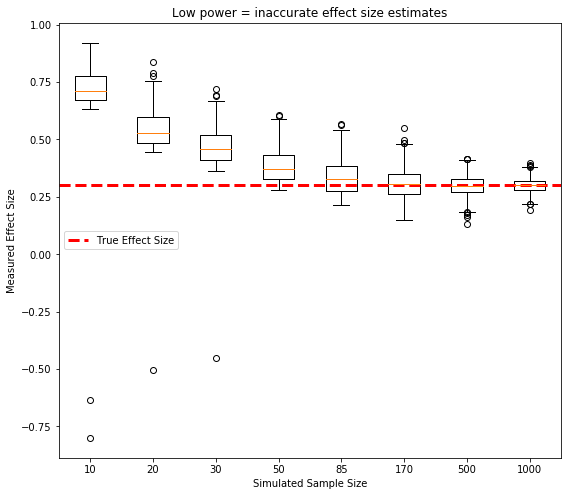

In [4]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 8))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(final_data)
plt.xlabel("Simulated Sample Size")
plt.ylabel("Measured Effect Size")
plt.title("Low power = inaccurate effect size estimates")
## Custom x-axis labels
ax.set_xticklabels(sample_sizes)
axh = ax.axhline(y=cor, color='r', linestyle='dashed', linewidth=3)
plt.legend((axh,), ("True Effect Size",), loc="center left")
plt.show()